In [1]:
### Data Loader Function:

# Group Activity Data Loader:
# 	1. Can return a full image of target frame with its group label (frame, tensor(8)) *needed for B1*. 
# 	2. Can return a all player crops of the target frame with its group label all player have same label  ( (12, crop frame), tensor(1,8)) *needed for B3 step B, C*.
# 	3. Can return a full clip with each frame dir with its group label (all the same) ((9, frame) , tensor(9,8)) *needed for B4*.
#   4. Can return a full clip with all player crop with its group label (all the same) ((12, 9, crop frame), tensor(9,8)) *needed for B5, B6, B7*.

#  Person Activity Data Loader:
# 	1. Can return crop of player image frames in independent way (crop frame , tensor(9)) *needed for B3 step A , B6*.
# 	2. Can return crop of player in the same clip (12 , 9, crop frame) , (tensor(12, 9, 9)) *needed for B5, B7*.
	
# Note:
# 1.  Frame and crop frame means all image dim (C, H, W).
# 2.  The Sort flag (sort the player by the tracer id) *needed for B8*.

################################################################################################################################
import os
import sys
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as T
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.transforms import v2

PROJECT_ROOT= "/teamspace/studios/this_studio/Group-Activity-Recognition"
sys.path.append(os.path.abspath(PROJECT_ROOT))
from data_loader import Person_Activity_DataSet, Group_Activity_DataSet

dataset_root = "/teamspace/studios/this_studio/Group-Activity-Recognition/data"
annot_path =   f"{dataset_root}/annot_all.pkl"
videos_path =  f"{dataset_root}/videos"

people_activity_clases = ["Waiting", "Setting", "Digging", "Falling" ,"Spiking"	, "Blocking", "Jumping"	, "Moving", "Standing"]
person_activity_labels  = {class_name.lower():i for i, class_name in enumerate(people_activity_clases)}

group_activity_clases = ["r_set", "r_spike" , "r-pass", "r_winpoint", "l_winpoint", "l-pass", "l-spike", "l_set"]
group_activity_labels  = {class_name:i for i, class_name in enumerate(group_activity_clases)}

train_spilt = [1, 3, 6, 7, 10, 13, 15, 16, 18, 22, 23, 31, 32, 36, 38, 39, 40, 41, 42, 48, 50, 52, 53, 54]


### Test people activity data loader

#### 1. Can return crop of player image frames in independent way (crop frame , tensor(9)) *needed for B3 step A , B6*.

In [ ]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])

data_loader = Person_Activity_DataSet(videos_path, annot_path, split=train_spilt, seq=False, labels=person_activity_labels, transform=transforms)

In [ ]:
len(data_loader)

231327

In [ ]:
frame , label = data_loader[0]

label.shape # (,9) class of person activity 

torch.Size([9])

In [ ]:
label

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)

In [ ]:
frame.shape # (C, H, W)

torch.Size([3, 224, 224])

Standing


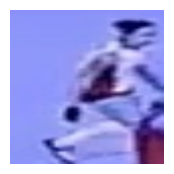

In [ ]:
frame , label = data_loader[50]

label_idex = label.argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(frame.permute(1,2,0))  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

Setting


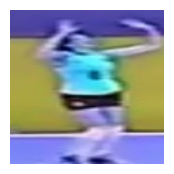

In [ ]:
frame , label = data_loader[450]

label_idex = label.argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(frame.permute(1,2,0))  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

Standing


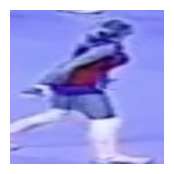

In [ ]:
frame , label = data_loader[120]

label_idex = label.argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(frame.permute(1,2,0))  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

Falling


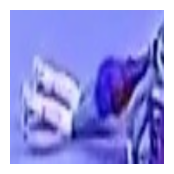

In [ ]:
frame , label = data_loader[800]

label_idex = label.argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(frame.permute(1,2,0))  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

#### 2. Can return crop of player in the same clip (12 , 9, crop frame) , (tensor(12, 9, 9)) *needed for B5, B7*.

In [ ]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])

data_loader = Person_Activity_DataSet(videos_path, annot_path, split=train_spilt, seq=True, labels=person_activity_labels, transform=transforms)

In [ ]:
len(data_loader)

2152

In [ ]:
clip, label = data_loader[100]

label.shape # (12 player , 9 frame , label of 9 class)

torch.Size([12, 9, 9])

In [ ]:
label[0, 0, :]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=torch.float64)

In [ ]:
clip.shape #  (12 player, 9 frame, C, H, W)

torch.Size([12, 9, 3, 224, 224])

Standing


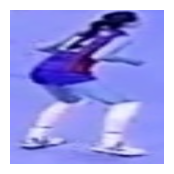

In [ ]:
label_idex = label[0, 0].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # frist player  - first frame
plt.imshow(clip[0, 0].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  # Optional: to hide axes
plt.show()

Standing


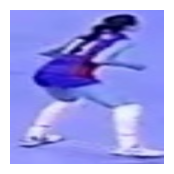

In [ ]:
label_idex = label[0, 2].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # frist player  - Thrid frame
plt.imshow(clip[0, 2].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


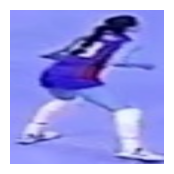

In [ ]:
label_idex = label[0, 4].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(clip[0, 4].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


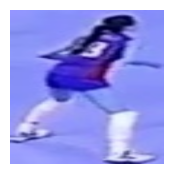

In [ ]:
label_idex = label[0, 6].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(clip[0, 6].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


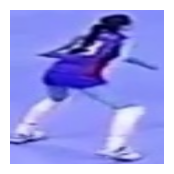

In [ ]:
label_idex = label[0, 8].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # frist player  - last frame
plt.imshow(clip[0, 8].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


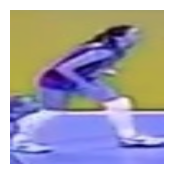

In [ ]:
label_idex = label[8, 2].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2))
plt.imshow(clip[1, 0].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


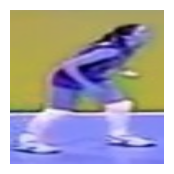

In [ ]:
label_idex = label[8, 4].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2))
plt.imshow(clip[1, 4].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


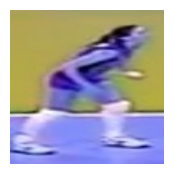

In [ ]:
label_idex = label[8, 6].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) 
plt.imshow(clip[1, 6].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()

Standing


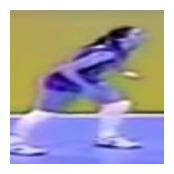

In [ ]:
label_idex = label[8, 8].argmax().item()
print(f"{people_activity_clases[label_idex]}")

plt.figure(figsize=(2, 2)) # second player  - last frame
plt.imshow(clip[1, 8].permute(1, 2, 0).numpy())  # Converts from (C, H, W) to (H, W, C)
plt.axis('off')  
plt.show()


## Test Group Activity data loader

#### 1. Can return a full image of target frame with its group label (frame, tensor(8)) *needed for B1*. 

In [ ]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])


data_loader = Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=False , seq=False, labels=group_activity_labels, transform=transforms)

In [ ]:
len(data_loader) 

In [ ]:
frame , label = data_loader[0]

In [ ]:
print(label.shape) # (,8)
label 

In [ ]:
frame.shape # (C, H , W)

In [ ]:
index = data_loader[0][1].argmax().item()
print(f"{group_activity_clases[index]}")

plt.imshow(data_loader[0][0].permute(1,2,0)) 
plt.show()

In [ ]:
index = data_loader[152][1].argmax().item()
print(f"{group_activity_clases[index]}")

plt.imshow(data_loader[152][0].permute(1,2,0))
plt.show()

#### 2. Can return a all player crops of the target frame with its group label (all player have same label)  ( (12, crop frame), tensor(1,8)) *needed for B3 step B, C*.

In [ ]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])

data_loader= Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=True , seq=False, labels=group_activity_labels, transform=transforms)

In [ ]:
len(data_loader) # the differents between case 1 and 2 the input consist of 12 bbox

In [ ]:
frame_crops, label = data_loader[152]

In [ ]:
print(label.shape) # (,8)
label

In [ ]:
frame_crops.shape # (12, C, H, W) ---> 12 bbox of the frame

In [ ]:
plt.imshow(frame_crops[0].permute(1,2,0))  # first bbox of the fraem
plt.show()

In [ ]:
plt.imshow(frame_crops[11].permute(1,2,0))  # last bbox of the frame
plt.show()

#### 3. Can return a full clip with each frame dir with its group label (all the same) ((9, frame) , tensor(9,8)) *needed for B4*.

In [ ]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])

data_loader = Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=False , seq=True, labels=group_activity_labels, transform=transforms)

In [ ]:
len(data_loader)

In [ ]:
clip , label = data_loader[100] 
clip.shape # (9 frames, C, H, W)

In [ ]:
group_activity_labels

In [ ]:
plt.figure(figsize=(2, 2)) # First frame of the clip
plt.imshow(clip[0].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

In [ ]:
plt.figure(figsize=(2, 2)) # second frame of the clip
plt.imshow(clip[1].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

In [ ]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[2].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

In [ ]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[3].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

In [ ]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[4].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

In [ ]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[5].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

In [ ]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[6].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

In [ ]:
plt.figure(figsize=(2, 2)) 
plt.imshow(clip[7].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

In [ ]:
plt.figure(figsize=(2, 2)) # Last frame of the clip
plt.imshow(clip[8].permute(1, 2, 0).numpy())  
plt.axis('off') 
plt.show()

#### 4. Can return a full clip with all player crop with its group label (all the same) ((12, 9, crop frame), tensor(9,8)) *needed for B5, B6, B7*.

In [ ]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])

data_loader = Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=True , seq=True, labels=group_activity_labels, transform=transforms)

In [ ]:
len(data_loader)

In [ ]:
clip, label = data_loader[50]

In [ ]:
label.shape # (9, 8) each frame has the same label

In [ ]:
label

In [ ]:
clip.shape # (12, 9, C, H, W) 12 player , 9 frames, Channls , High, Width

In [ ]:
frame0 = clip[:, 0, : , : , :] 

titles = [f"Player {i+1}" for i in range(12)]  

plt.figure(figsize=(15, 5))
for i, player in enumerate(frame0):
    plt.subplot(2, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

In [ ]:
frame1 = clip[:, 1, : , : , :] 

plt.figure(figsize=(15, 5))
for i, player in enumerate(frame1):
    plt.subplot(2, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

In [ ]:
frame2 = clip[:, 2, : , : , :] 

plt.figure(figsize=(15, 5))
for i, player in enumerate(frame2):
    plt.subplot(2, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

In [ ]:
frame3 = clip[:, 3, : , : , :] 

plt.figure(figsize=(15, 5))
for i, player in enumerate(frame3):
    plt.subplot(2, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

In [ ]:
frame4 = clip[:, 4, : , : , :] 

plt.figure(figsize=(15, 5))
for i, player in enumerate(frame4):
    plt.subplot(2, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

In [ ]:
frame5 = clip[:, 5, : , : , :] 

plt.figure(figsize=(15, 5))
for i, player in enumerate(frame5):
    plt.subplot(2, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

In [ ]:
frame6 = clip[:, 6, : , : , :] 

plt.figure(figsize=(15, 5))
for i, player in enumerate(frame6):
    plt.subplot(2, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

In [ ]:
frame7 = clip[:, 7, : , : , :] 

plt.figure(figsize=(15, 5))
for i, player in enumerate(frame7):
    plt.subplot(2, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

In [ ]:
frame8 = clip[:, 8, : , : , :] 

plt.figure(figsize=(15, 5))
for i, player in enumerate(frame8):
    plt.subplot(2, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

#### 4.2 Can return a full clip with sorted player crop with its group label (all the same) ((12, 9, crop frame), tensor(9,8)) *needed for B8*

**Note:** we sort player recored x-axis to separate each team.

In [ ]:
transforms = A.Compose([
    A.Resize(224, 224),  
    ToTensorV2()
])

data_loader = Group_Activity_DataSet(videos_path, annot_path, split=train_spilt, crops=True , seq=True, sort=True, labels=group_activity_labels, transform=transforms)

In [ ]:
clip, label = data_loader[50]
clip.shape

In [ ]:
frist_frame = clip[:, 0, : , : , :] # take the frist frame

titles = [f"Player {i+1}" for i in range(12)]  

plt.figure(figsize=(15, 5))

for i, player in enumerate(frist_frame[:6]): # take frist team
    plt.subplot(1, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))

for i, player in enumerate(frist_frame[6:]): # take second team
    plt.subplot(1, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i + 6])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

In [ ]:
clip, label = data_loader[600]

frist_frame = clip[:, 0, : , : , :] # take the frist frame

titles = [f"Player {i+1}" for i in range(12)]  

plt.figure(figsize=(15, 5))

for i, player in enumerate(frist_frame[:6]): # take frist team
    plt.subplot(1, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i])  
    plt.axis('off')      

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))

for i, player in enumerate(frist_frame[6:]): # take second team
    plt.subplot(1, 6, i + 1)
    plt.imshow(player.permute(1, 2, 0).numpy())
    plt.title(titles[i + 6])  
    plt.axis('off')      

plt.tight_layout()
plt.show()